# Introdução

In [40]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime, date, timedelta

In [2]:
# df_bike_original = pd.read_parquet("Dados/citibike.parquet", engine="fastparquet")
df_bike_original = pd.read_parquet("Dados/citibike_70percent.parquet", engine="fastparquet")

In [3]:
df_bike = df_bike_original

In [4]:
df_bike

tripduration                 starttime                  stoptime  \
0                  393       2017-01-21 23:04:08       2017-01-21 23:10:41   
1                  726       2017-01-19 08:50:17       2017-01-19 09:02:24   
2                  608       2017-01-31 07:45:54       2017-01-31 07:56:03   
3                  208       2017-01-30 15:16:52       2017-01-30 15:20:21   
4                  311       2017-01-27 16:02:02       2017-01-27 16:07:14   
...                ...                       ...                       ...   
38125261          1201  2019-12-11 16:52:18.5060  2019-12-11 17:12:20.0610   
38125262           497  2019-12-18 14:55:54.7220  2019-12-18 15:04:11.7890   
38125263           557  2019-12-02 07:49:13.8970  2019-12-02 07:58:31.8290   
38125264           503  2019-12-12 09:09:37.3970  2019-12-12 09:18:00.4740   
38125265           766  2019-12-17 17:20:14.4610  2019-12-17 17:33:01.1560   

          start station id        start station name  start station latitude  \
0                    441.0           E 52 St & 2 Ave               40.756014   
1                   2008.0     Little West St & 1 Pl               40.705693   
2                    523.0           W 38 St & 8 Ave               40.754666   
3                   3382.0     Carroll St & Smith St               40.680611   
4                   3389.0  Carroll St & Columbia St               40.683046   
...                    ...                       ...                     ...   
38125261            3733.0        Avenue C & E 18 St               40.730563   
38125262            3561.0            37 Ave & 35 St               40.753111   
38125263              72.0          W 52 St & 11 Ave               40.767272   
38125264             505.0           6 Ave & W 33 St               40.749013   
38125265             462.0          W 22 St & 10 Ave               40.746920   

          start station longitude  end station id           end station name  \
0                      -73.967416           527.0            E 33 St & 2 Ave   
1                      -74.016777           330.0        Reade St & Broadway   
2                      -73.991382           491.0       E 24 St & Park Ave S   
3                      -73.994758          3321.0      Clinton St & Union St   
4                      -74.003486          3344.0  Pioneer St & Van Brunt St   
...                           ...             ...                        ...   
38125261               -73.973984           168.0            W 18 St & 6 Ave   
38125262               -73.927992          3597.0           43 St & Broadway   
38125263               -73.993929          3233.0            E 48 St & 5 Ave   
38125264               -73.988484           477.0            W 41 St & 8 Ave   
38125265               -74.004519           519.0      Pershing Square North   

          end station latitude  end station longitude  bikeid    usertype  \
0                    40.744023             -73.976056   26621  Subscriber   
1                    40.714505             -74.005628   18557  Subscriber   
2                    40.740964             -73.986022   19212  Subscriber   
3                    40.683116             -73.997853   19092  Subscriber   
4                    40.679043             -74.011169   16971  Subscriber   
...                        ...                    ...     ...         ...   
38125261             40.739713             -73.994564   30702  Subscriber   
38125262             40.757728             -73.916637   16094  Subscriber   
38125263             40.757246             -73.978059   39569  Subscriber   
38125264             40.756405             -73.990026   19352  Subscriber   
38125265             40.751873             -73.977706   31127  Subscriber   

          birth year  gender  
0             1985.0       1  
1             1979.0       1  
2             1974.0       1  
3             1973.0       1  
4             1985.0       2  
...              ...     ...  
38125261 

In [112]:
df_tempo = pd.read_csv("Dados/NOAA/historical_central_park.csv")

# Análise Inicial

In [5]:
df_bike.describe()

tripduration  start station id  start station latitude  \
count  3.812527e+07      3.812334e+07            3.812527e+07   
mean   9.870503e+02      1.547458e+03            4.073713e+01   
std    1.546529e+04      1.432722e+03            4.805001e-02   
min    6.100000e+01      7.200000e+01            0.000000e+00   
25%    3.640000e+02      3.770000e+02            4.071757e+01   
50%    6.140000e+02      5.010000e+02            4.073805e+01   
75%    1.072000e+03      3.233000e+03            4.075715e+01   
max    1.951005e+07      3.911000e+03            4.550636e+01   

       start station longitude  end station id  end station latitude  \
count             3.812527e+07    3.812334e+07          3.812527e+07   
mean             -7.398293e+01    1.538944e+03          4.073683e+01   
std               6.932864e-02    1.431586e+03          3.893134e-02   
min              -7.403423e+01    7.200000e+01          0.000000e+00   
25%              -7.399565e+01    3.760000e+02          4.071755e+01   
50%              -7.398602e+01    5.000000e+02          4.073726e+01   
75%              -7.397364e+01    3.233000e+03          4.075660e+01   
max               0.000000e+00    3.911000e+03          4.550636e+01   

       end station longitude        bikeid    birth year        gender  
count           3.812527e+07  3.812527e+07  3.698359e+07  3.812527e+07  
mean           -7.398318e+01  2.689604e+04  1.979435e+03  1.146954e+00  
std             4.716792e-02  6.968112e+03  1.199775e+01  5.472328e-01  
min            -7.408364e+01  1.452900e+04  1.857000e+03  0.000000e+00  
25%            -7.399596e+01  2.017200e+04  1.969000e+03  1.000000e+00  
50%            -7.398658e+01  2.781900e+04  1.982000e+03  1.000000e+00  
75%            -7.397371e+01  3.209100e+04  1.989000e+03  1.000000e+00  
max             0.000000e+00  4.208800e+04  2.003000e+03  2.000000e+00

Podemos verificar:

* Latitudes e Longitudes zeradas

# Tratamento

### Remoção de Nulos

In [6]:
df_bike.isna().sum()

tripduration                     0
starttime                        0
stoptime                         0
start station id              1925
start station name            1925
start station latitude           0
start station longitude          0
end station id                1925
end station name              1925
end station latitude             0
end station longitude            0
bikeid                           0
usertype                     11181
birth year                 1141676
gender                           0
dtype: int64

In [7]:
df_bike = df_bike.dropna(subset=['start station id', 'end station id'])

In [8]:
len(df_bike)

38123341

### Tipos dos Dados

In [9]:
df_bike.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

In [10]:
df_bike["starttime"] = pd.to_datetime(df_bike["starttime"])
df_bike["stoptime"] = pd.to_datetime(df_bike["stoptime"])

<ipython-input-10-1f6478f7fa6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike["starttime"] = pd.to_datetime(df_bike["starttime"])
<ipython-input-10-1f6478f7fa6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike["stoptime"] = pd.to_datetime(df_bike["stoptime"])


In [11]:
df_bike.loc[:, "start station id"] = df_bike["start station id"].astype(int).values
df_bike.loc[:, "end station id"] = df_bike["end station id"].astype(int).values

c:\users\vinic\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Remoção de Outliers

In [12]:
# df_bike[df_bike["tripduration"] < 60*60]["tripduration"].plot.hist(bins=30)

In [13]:
# Retiramos as pessoas com mais de 5 horas de duration ou com menos de 60 segundos
df_bike = df_bike[
    (df_bike["tripduration"] > 60)
    & (df_bike["tripduration"] < 60*60*5)
]

### Latitude e Longitude Zeradas

In [14]:
filter_startlat0 = (df_bike["start station latitude"] == 0)
filter_startlon0 = (df_bike["start station longitude"] == 0)
filter_endlat0 = (df_bike["end station latitude"] == 0)
filter_endlon0 = (df_bike["end station longitude"] == 0)

df_bike = df_bike[(~filter_startlat0) & (~filter_startlon0) & (~filter_endlat0) & (~filter_endlon0)]

# Transformação dos Dados

Nosso objetivo é trabalhar com os dados de demanda por bicicletas para cada uma das estações, então realizaremos esse agrupamento.

In [15]:
len(df_bike)

38087682

In [16]:
df = df_bike.copy()
df["datehour"] = df["starttime"].dt.floor("H").copy()

In [17]:
df.head()

tripduration           starttime            stoptime  start station id  \
0           393 2017-01-21 23:04:08 2017-01-21 23:10:41               441   
1           726 2017-01-19 08:50:17 2017-01-19 09:02:24              2008   
2           608 2017-01-31 07:45:54 2017-01-31 07:56:03               523   
3           208 2017-01-30 15:16:52 2017-01-30 15:20:21              3382   
4           311 2017-01-27 16:02:02 2017-01-27 16:07:14              3389   

         start station name  start station latitude  start station longitude  \
0           E 52 St & 2 Ave               40.756014               -73.967416   
1     Little West St & 1 Pl               40.705693               -74.016777   
2           W 38 St & 8 Ave               40.754666               -73.991382   
3     Carroll St & Smith St               40.680611               -73.994758   
4  Carroll St & Columbia St               40.683046               -74.003486   

   end station id           end station name  end station latitude  \
0             527            E 33 St & 2 Ave             40.744023   
1             330        Reade St & Broadway             40.714505   
2             491       E 24 St & Park Ave S             40.740964   
3            3321      Clinton St & Union St             40.683116   
4            3344  Pioneer St & Van Brunt St             40.679043   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -73.976056   26621  Subscriber      1985.0       1   
1             -74.005628   18557  Subscriber      1979.0       1   
2             -73.986022   19212  Subscriber      1974.0       1   
3             -73.997853   19092  Subscriber      1973.0       1   
4             -74.011169   16971  Subscriber      1985.0       2   

             datehour  
0 2017-01-21 23:00:00  
1 2017-01-19 08:00:00  
2 2017-01-31 07:00:00  
3 2017-01-30 15:00:00  
4 2017-01-27 16:00:00

In [166]:
df_bike_demand = df.groupby(["datehour"]).size().rename("total").asfreq("H").fillna(0)

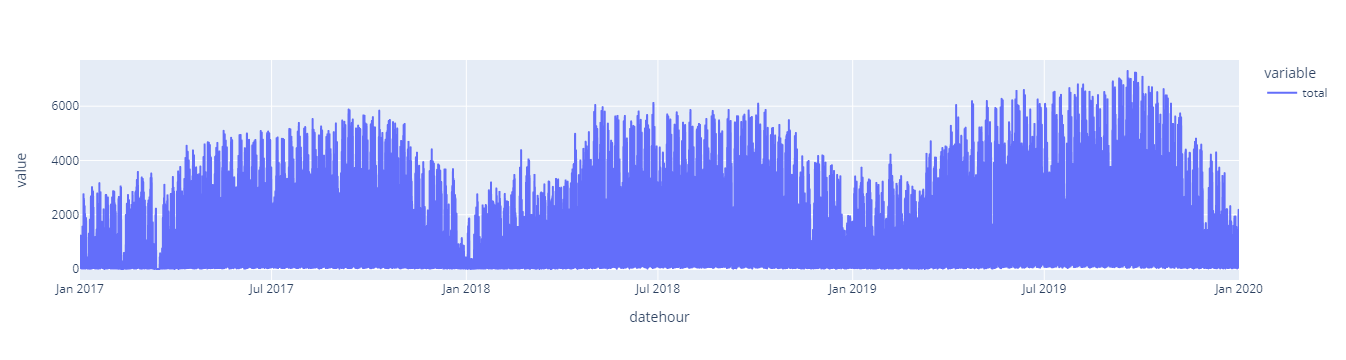

In [167]:
px.line(df_bike_demand)

In [168]:
df_bike_demand = pd.DataFrame(df_bike_demand)

# Data Augmentation

### Feriados

In [169]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [170]:
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df_bike_demand.index.min(), end=df_bike_demand.index.max())
print(holidays)

DatetimeIndex(['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29',
               '2017-07-04', '2017-09-04', '2017-10-09', '2017-11-10',
               '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15',
               '2018-02-19', '2018-05-28', '2018-07-04', '2018-09-03',
               '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-25',
               '2019-01-01', '2019-01-21', '2019-02-18', '2019-05-27',
               '2019-07-04', '2019-09-02', '2019-10-14', '2019-11-11',
               '2019-11-28', '2019-12-25'],
              dtype='datetime64[ns]', freq=None)


In [171]:
df_bike_demand["isholiday"] = pd.to_datetime(df_bike_demand.index.date).isin(holidays)

### Próximo de Feriado

In [172]:
proximo_de_feriado = pd.concat([
    pd.Series(holidays + timedelta(days=1)),
    pd.Series(holidays - timedelta(days=1))
], ignore_index=True).values

In [173]:
df_bike_demand["isnearholiday"] = pd.to_datetime(df_bike_demand.index.date).isin(proximo_de_feriado)

### Fins de Semana

In [174]:
df_bike_demand["isweekend"] = df_bike_demand.index.weekday >= 5

### Média Móvel

In [175]:
df_bike_demand["ma_total"] = df_bike_demand.rolling(30)["total"].mean().bfill()

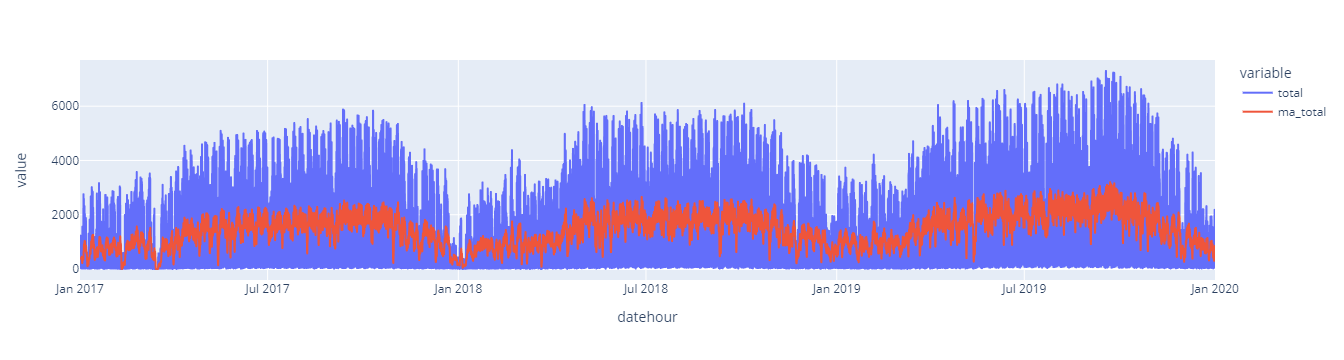

In [176]:
px.line(df_bike_demand[["total", "ma_total"]])

### Dados de Tempo

In [177]:
df_tempo.columns

Index(['Date', 'TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

In [178]:
df_tempo["Date"] = pd.to_datetime(df_tempo["Date"])

In [179]:
df_tempo = df_tempo.rename(
    columns={
        'TAVG (Degrees Fahrenheit)': 'TAVG', 
        'TMAX (Degrees Fahrenheit)': 'TMAX',
        'TMIN (Degrees Fahrenheit)': 'TMIN', 
        'PRCP (Inches)': 'PRCP', 
        'SNOW (Inches)': 'SNOW',
        'SNWD (Inches)': 'SNWD'
    }
)

In [180]:
df_bike_demand["date"] = pd.to_datetime(df_bike_demand.index.date)

In [181]:
df_bike_demand = df_bike_demand.reset_index().merge(df_tempo, left_on="date", right_on="Date", how="left").drop(["Date"], axis=1).set_index("datehour")

In [182]:
df_bike_demand["TAVG"] = (df_bike_demand["TMIN"] + df_bike_demand["TMAX"])/2

In [183]:
df_bike_demand

total  isholiday  isnearholiday  isweekend    ma_total  \
datehour                                                                      
2017-01-01 00:00:00  249.0      False           True       True  382.500000   
2017-01-01 01:00:00  246.0      False           True       True  382.500000   
2017-01-01 02:00:00  199.0      False           True       True  382.500000   
2017-01-01 03:00:00  146.0      False           True       True  382.500000   
2017-01-01 04:00:00   66.0      False           True       True  382.500000   
...                    ...        ...            ...        ...         ...   
2019-12-31 19:00:00  782.0      False          False      False  846.200000   
2019-12-31 20:00:00  505.0      False          False      False  848.900000   
2019-12-31 21:00:00  386.0      False          False      False  847.200000   
2019-12-31 22:00:00  390.0      False          False      False  849.033333   
2019-12-31 23:00:00  291.0      False          False      False  837.600000   

                          date  TAVG  TMAX  TMIN  PRCP  SNOW  SNWD  
datehour                                                            
2017-01-01 00:00:00 2017-01-01  44.0  48.0  40.0  0.00   0.0   0.0  
2017-01-01 01:00:00 2017-01-01  44.0  48.0  40.0  0.00   0.0   0.0  
2017-01-01 02:00:00 2017-01-01  44.0  48.0  40.0  0.00   0.0   0.0  
2017-01-01 03:00:00 2017-01-01  44.0  48.0  40.0  0.00   0.0   0.0  
2017-01-01 04:00:00 2017-01-01  44.0  48.0  40.0  0.00   0.0   0.0  
...                        ...   ...   ...   ...   ...   ...   ...  
2019-12-31 19:00:00 2019-12-31  40.5  45.0  36.0  0.02   0.0   0.0  
2019-12-31 20:00:00 2019-12-31  40.5  45.0  36.0  0.02   0.0   0.0  
2019-12-31 21:00:00 2019-12-31  40.5  45.0  36.0  0.02   0.0   0.0  
2019-12-31 22:00:00 2019-12-31  40.5  45.0  36.0  0.02   0.0   0.0  
2019-12-31 23:00:00 2019-12-31  40.5  45.0  36.0  0.02   0.0   0.0  

[26280 rows x 12 columns]

# Salvamento dos Dados

In [184]:
df_bike_demand.to_csv("Dados/daily_demand.csv")

# Adicionando Calendário Fourier e Separando Conjuntos

In [4]:
from datetime import datetime, date, timedelta
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime, date, timedelta

from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

In [5]:
df_daily_demand = pd.read_csv("Dados/daily_demand.csv")

In [6]:
df_daily_demand["datehour"] = pd.to_datetime(df_daily_demand["datehour"])

In [7]:
df_daily_demand = df_daily_demand.set_index("datehour").asfreq("H")

In [8]:
df_daily_demand.head()

total  isholiday  isnearholiday  isweekend  ma_total  \
datehour                                                                    
2017-01-01 00:00:00  249.0      False           True       True     382.5   
2017-01-01 01:00:00  246.0      False           True       True     382.5   
2017-01-01 02:00:00  199.0      False           True       True     382.5   
2017-01-01 03:00:00  146.0      False           True       True     382.5   
2017-01-01 04:00:00   66.0      False           True       True     382.5   

                           date  TAVG  TMAX  TMIN  PRCP  SNOW  SNWD  
datehour                                                             
2017-01-01 00:00:00  2017-01-01  44.0  48.0  40.0   0.0   0.0   0.0  
2017-01-01 01:00:00  2017-01-01  44.0  48.0  40.0   0.0   0.0   0.0  
2017-01-01 02:00:00  2017-01-01  44.0  48.0  40.0   0.0   0.0   0.0  
2017-01-01 03:00:00  2017-01-01  44.0  48.0  40.0   0.0   0.0   0.0  
2017-01-01 04:00:00  2017-01-01  44.0  48.0  40.0   0.0   0.0   0.0

### Separação de Teste e Treinamento

In [9]:
split_index = "2019-01-01"

train_series = df_daily_demand[df_daily_demand.index < split_index].asfreq("H")
test_series = df_daily_demand[df_daily_demand.index >= split_index].asfreq("H")

### Calendário Fourier

In [10]:
fourierAnnual = CalendarFourier(freq="A", order=365)  # 10 sin/cos pairs for "A"nnual seasonality

In [11]:
dp = DeterministicProcess(
    index=train_series.index,
    constant=True,                           # dummy feature for bias (y-intercept)
    order=1,                                 # trend (order 1 means linear)
    seasonal=True,                           # weekly seasonality (indicators)
    additional_terms=[fourierAnnual],        # annual seasonality (fourier)
    drop=True,                               # drop terms to avoid collinearity
)

### Dados de Treino e Teste

In [12]:
new_columns = ['isholiday', 'isnearholiday', 'isweekend', 'ma_total', 'TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD']

In [13]:
X_train = dp.in_sample().copy()
X_train[new_columns] = train_series[new_columns]

In [14]:
X_test = dp.out_of_sample(len(test_series)).copy()
X_test[new_columns] = test_series[new_columns]

In [15]:
y_train = train_series["total"]
y_test = test_series["total"]

In [16]:
X_train.tail()

const    trend  s(2,24)  s(3,24)  s(4,24)  s(5,24)  \
datehour                                                                  
2018-12-31 19:00:00    1.0  17516.0      0.0      0.0      0.0      0.0   
2018-12-31 20:00:00    1.0  17517.0      0.0      0.0      0.0      0.0   
2018-12-31 21:00:00    1.0  17518.0      0.0      0.0      0.0      0.0   
2018-12-31 22:00:00    1.0  17519.0      0.0      0.0      0.0      0.0   
2018-12-31 23:00:00    1.0  17520.0      0.0      0.0      0.0      0.0   

                     s(6,24)  s(7,24)  s(9,24)  s(10,24)  ...  isholiday  \
datehour                                                  ...              
2018-12-31 19:00:00      0.0      0.0      0.0       0.0  ...      False   
2018-12-31 20:00:00      0.0      0.0      0.0       0.0  ...      False   
2018-12-31 21:00:00      0.0      0.0      0.0       0.0  ...      False   
2018-12-31 22:00:00      0.0      0.0      0.0       0.0  ...      False   
2018-12-31 23:00:00      0.0      0.0      0.0       0.0  ...      False   

                     isnearholiday  isweekend    ma_total  TAVG  TMAX  TMIN  \
datehour                                                                      
2018-12-31 19:00:00           True      False  726.833333  42.0  48.0  36.0   
2018-12-31 20:00:00           True      False  683.733333  42.0  48.0  36.0   
2018-12-31 21:00:00           True      False  636.566667  42.0  48.0  36.0   
2018-12-31 22:00:00           True      False  594.433333  42.0  48.0  36.0   
2018-12-31 23:00:00           True      False  557.466667  42.0  48.0  36.0   

                     PRCP  SNOW  SNWD  
datehour                               
2018-12-31 19:00:00  1.02   0.0   0.0  
2018-12-31 20:00:00  1.02   0.0   0.0  
2018-12-31 21:00:00  1.02   0.0   0.0  
2018-12-31 22:00:00  1.02   0.0   0.0  
2018-12-31 23:00:00  1.02   0.0   0.0  

[5 rows x 763 columns]

In [21]:
X_test.tail()

const    trend  s(2,24)  s(3,24)  s(4,24)  s(5,24)  \
datehour                                                                  
2019-12-31 19:00:00    1.0  26276.0      0.0      0.0      0.0      0.0   
2019-12-31 20:00:00    1.0  26277.0      0.0      0.0      0.0      0.0   
2019-12-31 21:00:00    1.0  26278.0      0.0      0.0      0.0      0.0   
2019-12-31 22:00:00    1.0  26279.0      0.0      0.0      0.0      0.0   
2019-12-31 23:00:00    1.0  26280.0      0.0      0.0      0.0      0.0   

                     s(6,24)  s(7,24)  s(9,24)  s(10,24)  ...  isholiday  \
datehour                                                  ...              
2019-12-31 19:00:00      0.0      0.0      0.0       0.0  ...      False   
2019-12-31 20:00:00      0.0      0.0      0.0       0.0  ...      False   
2019-12-31 21:00:00      0.0      0.0      0.0       0.0  ...      False   
2019-12-31 22:00:00      0.0      0.0      0.0       0.0  ...      False   
2019-12-31 23:00:00      0.0      0.0      0.0       0.0  ...      False   

                     isnearholiday  isweekend    ma_total  TAVG  TMAX  TMIN  \
datehour                                                                      
2019-12-31 19:00:00          False      False  846.200000  40.5  45.0  36.0   
2019-12-31 20:00:00          False      False  848.900000  40.5  45.0  36.0   
2019-12-31 21:00:00          False      False  847.200000  40.5  45.0  36.0   
2019-12-31 22:00:00          False      False  849.033333  40.5  45.0  36.0   
2019-12-31 23:00:00          False      False  837.600000  40.5  45.0  36.0   

                     PRCP  SNOW  SNWD  
datehour                               
2019-12-31 19:00:00  0.02   0.0   0.0  
2019-12-31 20:00:00  0.02   0.0   0.0  
2019-12-31 21:00:00  0.02   0.0   0.0  
2019-12-31 22:00:00  0.02   0.0   0.0  
2019-12-31 23:00:00  0.02   0.0   0.0  

[5 rows x 763 columns]

In [18]:
y_train.tail()

datehour
2018-12-31 19:00:00    102.0
2018-12-31 20:00:00    133.0
2018-12-31 21:00:00     61.0
2018-12-31 22:00:00     73.0
2018-12-31 23:00:00     48.0
Freq: H, Name: total, dtype: float64

In [19]:
y_test.tail()

datehour
2019-12-31 19:00:00    782.0
2019-12-31 20:00:00    505.0
2019-12-31 21:00:00    386.0
2019-12-31 22:00:00    390.0
2019-12-31 23:00:00    291.0
Freq: H, Name: total, dtype: float64

## Salvando Dados

In [22]:
X_train.index = X_train.index.rename("datehour")
X_train.to_csv("Dados/final_Xtrain.csv")

In [23]:
X_test.index = X_test.index.rename("datehour")
X_test.to_csv("Dados/final_Xtest.csv")

In [24]:
y_train.index = y_train.index.rename("datehour")
y_train.to_csv("Dados/final_Ytrain.csv")

In [25]:
y_test.index = y_test.index.rename("datehour")
y_test.to_csv("Dados/final_Ytest.csv")